# Die multiple, lineare Regressionsanalyse
Ein JupyterNotebook zur Beantwortung der wichtigsten Kernfragen:
- Wie gut beschreibt das Regressionsmodell die Situation?
- Kann ein (signifikanter) Einfluß der Merkmale auf die abhängige Variable belegt werden?
- Wie unabhängig sind Einflussfaktoren voneinander?

In [2]:
# Bitte ein Beispiel auswählen oder die Vorlage 12x5 zur Eingabe eigener Daten nutzen.
# Erforderliche Python-Pakete
%pip install ipywidgets ipython qgridnext pandas numpy scikit-learn scipy nbconvert pandoc>/dev/null 2>&1
#sudo apt update && apt install texlive-xetex texlive-fonts-recommended texlive-plain-generic pandoc
import ipywidgets as widgets
from ipywidgets import HBox
from IPython.display import display, clear_output
import qgridnext as qgrid
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import scipy.stats
from scipy.stats import f, t

# Beispiel: “Arbeitsmotivation mit mehreren Pradiktoren”
daten_arbeit = {
    'i': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,14,15,16,17,18,19,20,21,22,23,24,25],
    'y': [32, 14, 12, 27, 20, 13, 17, 8, 22, 19, 25, 23,17,22,19,27,26,20,11,24,19,19,22,24,17],
    'x1': [36, 30, 19, 42, 14, 12, 17, 4, 32, 15, 38, 24,28,36,18,40,30,27,18,32,33,33,27,30,37],
    'x2': [30, 11, 15, 16, 22, 16, 20, 5, 20, 13, 5, 6,11,4,26,27,28,11,23,18,9,22,28,32,8],
    'x3': [20, 30, 15, 39, 5, 6, 12, 0, 35, 8, 34, 26,32,26,12,36,27,26,13,19,25,30,18,21,11],
    'x4': [20, 7, 8, 13, 22, 11, 11, 16, 20, 13, 21, 9,10,16,6,12,18,10,11,15,6,5,17,11,2],
    'x5': [3100, 2600, 3200, 2500, 3700, 2600, 2500, 3800, 3500, 3100, 3600, 2600,2600,2500,2500,2500,3000,2600,2800,2700,2400,2600,4000,2700,2300],
    'x6': [34, 39, 42, 43, 42, 36, 41, 23, 25, 29, 59, 45,30,52,40,42,38,35,42,48,38,36,45,44,32],
    'x7': [29, 16, 13, 15, 29, 17, 18, 9, 21, 21, 27, 31,7,23,17,29,34,19,18,23,23,30,23,20,20],
    'x8': [69, 47, 32, 63, 38, 39, 44, 31, 40, 57, 53, 54,45,56,54,44,43,46,31,51,37,39,52,41,44],
    'x9': [66, 36, 17, 49, 62, 51, 55, 33, 55, 56, 67, 62, 26,64,55,62,64,55,43,53,65,39,54,47,41]
}

daten_auto = {
    'i': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,14],
    'y': [19990, 20990, 21475, 23411, 23890, 25980, 28689, 31750, 34380, 34460, 34830, 34960, 35411, 35930],
    'x1': [8710, 9890, 5425, 10419, 8590, 18062, 7960, 14100, 2637, 18000, 14900, 17250, 15949, 19888],
    'x2': [11.7, 13.7, 13.7, 13.7, 14.7, 12.7, 13.7, 14.7, 14.7, 11.7, 10.7, 12.7, 12.7, 11.7],
    'x3': [77, 77, 110, 110, 110, 110, 110, 110, 135, 135, 135, 135, 135, 135],
    'x4': [5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 6],
    'x5': [2, 0, 3, 3, 2, 2, 3, 3, 0, 0, 0, 0, 0, 0]
}

daten_immo = {
    'i': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    'y': [142000, 144000, 151000, 150000, 139000, 169000, 126000, 142900, 163000, 169000, 149000],
    'x1': [2310, 2333, 2356, 2379, 2402, 2425, 2448, 2471, 2494, 2517, 2540],
    'x2': [2, 2, 3, 3, 2, 4, 2, 2, 3, 4, 2],
    'x3': [2, 2, 1.5, 2, 3, 2, 1.5, 2, 3, 4, 3],
    'x4': [20, 3.6, 33, 43, 53, 23, 99, 34, 23, 55, 22]
}                 

daten_wahl = {
    'i': ['Neuwied', 'Ahrweiler', 'Koblenz', 'Cochem', 'Kreuznach', 'Bitburg', 'Trier', 'Montabaur', 'Mainz', 'Worms', 'Frankenthal', 'Ludwigshafen', 'Neustadt - S', 'Kaiserslautern', 'Pirmasens', 'Sudpfalz'],
    'y': [44.21, 50.13, 46.6 , 50.94, 39.1, 52.68, 44.82, 43.42, 40.86, 37.99, 39.71, 40.86, 46.48, 37.68, 42.79, 45.09 ],
    'x1': [55.55, 81.99, 73.14, 70.78, 32.6, 91.4 , 87.97, 50.76, 51.36, 32.81, 31.98, 38.01, 45.61, 34.89, 45.98, 55.07 ],
    'x2': [ 10.1,  9.6 ,  9.3 ,  10.8, 12  ,  9.3 ,  9.9 ,  8.4 ,  8.3 ,  9.6 , 10.6 , 10.1 ,  9.3 , 14.4 , 14.4 , 10.1  ]    
}

daten_dummy = {
    'i':  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'y':  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'x1': [0, 0, 0, 0, 0, 0, 0, 0, 0,  0,  0,  0],
    'x2': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'x3': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'x4': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'x5': [1, 1, 1, 1, 1, 1, 1, 1, 1,  1,  1,  1]
}                 

global dfr
dfr = pd.DataFrame()

# Beispiel Funktionen
def beispiel_1(b):
    with output:
        clear_output()
        print("y = Preis | x1 = Kilometer | x2 = Alter [Mon.] | x3 = Leistung [kW] | x4 = Schadstoffklasse | x5 = Ausstattung T/C/H")
        usesample(daten_auto)
    
def beispiel_2(b):
    with output:
        clear_output()
        print("y = Preis | x1 = Grundfläche (m²) | x2 = Büroräume | x3 = Eingänge | x4 = Alter (Jahre)")
        usesample(daten_immo)

def beispiel_3(b):
    with output:
        clear_output()
        print("y = Motivation | x1 = Ehrgeiz       | x2 = Kreativität | x3 = Leistungsstreben")
        print("                 x4 = Hierarchie    | x5 = Lohn        | x6 = Arbeitsbedingungen")
        print("                 x7 = Lernpotential | x8 = Vielfalt    | x9 = Anspruch")
        print("siehe https://www.ruhr-uni-bochum.de/imperia/md/content/mathematik3/lehre/ss10/methodenlehre2/teil219062010.pdf")
        usesample(daten_arbeit)

def beispiel_4(b):
    with output:
        clear_output()
        print("y = Wahlergebnis | x1 = Katholiken | x2 = Arbeitslose")
        print("Hypothesen: A: Je größer der Anteil der Katholiken, desto besser das Wahlergebnis.")
        print("            B: Je höher die Arbeitslosenquote, desto schlechter das Wahlergebnis.")
        print("siehe https://www.uni-koeln.de/wiso-fak/fisoz/Mitarbeiter/Best/S10.pdf")
        usesample(daten_wahl)
        
def beispiel_5(b):
    with output:
        clear_output()
        print("Bitte Daten einfügen und ggf. Zeilen löschen/hinzufügen.")
        usesample(daten_dummy)

def usesample(data):
    global dfr
    dfr = pd.DataFrame(data)
    if data == daten_dummy:
        editMode = True
    else:
        editMode = False
    global qgrid_widget
    qgrid_widget = qgrid.show_grid(dfr, show_toolbar=editMode, column_definitions={ 'index': { 'maxWidth': 0, 'minWidth': 0, 'width': 0 }}) #, grid_options=gropts)
    display(qgrid_widget)

# Erstellen der Schaltflächen
button1 = widgets.Button(description="Gebrauchtwagen")
button2 = widgets.Button(description="Immobilie")
button3 = widgets.Button(description="Arbeitsmotivation")
button4 = widgets.Button(description="Politbarometer")
button5 = widgets.Button(description="Vorlage 12x5")

# Zuweisen der Ereignis-Handler
button1.on_click(beispiel_1)
button2.on_click(beispiel_2)
button3.on_click(beispiel_3)
button4.on_click(beispiel_4)
button5.on_click(beispiel_5)

# Ausgabe-Widget für die Anzeige der Ergebnisse
# Erstellen eines HBox-Widgets mit den Schaltflächen als Kinder
buttons = HBox([button1, button2, button3,button4,button5])
output = widgets.Output()

# Anzeigen der Schaltflächen und des Ausgabe-Widgets
display(buttons, output)
dfr = pd.DataFrame(daten_auto)

Note: you may need to restart the kernel to use updated packages.


Output()

In [3]:
# Daten aufbereiten
df = qgrid_widget.get_changed_df()

# Drop the 'i' column
x_true = df.drop(columns=['i'], inplace=False)
x_true.drop(columns=['y'], inplace=True)

# Extract the 'y' column to a new DataFrame
y_true = df[['y']].copy()

# Drop the 'y' column from the original DataFrame
#df.drop(columns=['y'], inplace=True)

**Frage**: *Wie gut beschreibt das Regressionsmodell die Situation?*

Die Güte der Modellanpassung wird durch das Bestimmtheitsmaß R² beschrieben. Es beschreibt welchen Anteil die Regression an der gesamten, beobachteten Varianz erklärt. Aus der Gesamtvarianz der Regression und der Varianz der Residuen wird ein F-Wert berechnet. Auf dessen Basis und der F-Verteilung ist eine Bewertung dahingehend möglich, ob die zwischen der _abhängigen_ und der _unabhängigen_ Variablen beobachtete Beziehung zufällig ist oder nicht.

Sofern der Vertrauensbereich des Achsenabschnitts den Nullpunkt nicht einschließt, liegt ein zu berücksichtigender Offset vor.

Die relative Verfahrensstandardabweichung Vxo wird zur besseren Vergleichbarkeit herangezogen (z.B. beim Vergleich von Prüfverfahren oder Laboren).

In [13]:
# Kennzahlen des Regressionsmodells

debugMode = False
# Initialisieren Sie eine Instanz des LinearRegression-Objekts:
model = LinearRegression()  #fit_intercept=True,copy_X=True)

# Trainieren Sie das Modell durch Anpassen der Regressionsgerade an die Daten:
model.fit(x_true,y_true)          
y_pred = model.predict(x_true)

# k = Anz. Prädikatoren // m = ßn // n= Anz. Datensätze
n=len(x_true); 
m=model.coef_.flatten()
k=model.rank_
df=n-k-1

# Regressionskoeffizienten (beta_i)
if debugMode:
    print("=== CHECK ===")
    print("SPSS=\t0,053    0,206	0,165	-0,031	 0,000	0,246	0,049	0,153	0,193	-3,842")
    print("mx|b=\t0,053	0,206	0,165	-0,031	-0,001	0,246	0,049	0,153	0,193	-3,842")
beta  = m                   # model.coef_
beta0 = model.intercept_[0] # model.intercept_

result=f"ß{k}...ß1"
for value in beta[::-1]:
    result += f"\t{value:.3f}"    
result += f"\t{beta0:.3f}"
if debugMode:
    print(result)

# Calculate residuals
residuals = y_true - y_pred

# Calculate the sum of squares of residuals (SSR)
SSR = np.sum(residuals**2,axis=0).iloc[0]

# Calculate the sum of squares of regression (SSReg)
y_mean = np.mean(y_true)
SSReg = np.sum((y_pred - y_mean)**2,axis=0)[0]
SST = SSReg + SSR       # Total sum of squares (SST)
Rs = SSReg / SST        # R²
Rsk = 1-(n-1)/(n-k)*(1-Rs)

s2yx = (SSR / df)  # Residual variance (s²yx)
if debugMode:
    print("-------------")
    print("R²\tSPSS|EXCEL|NB = 92.95|92.95|%.2f" % (Rs*100))
    print("Syx|Sey\tSPSS|EXCEL|NB = 1.891|1.891|%.3f" % np.sqrt(s2yx))

# Synonym: s2yx == MSE
MSE = float(SSR / df)              # Calculate the residual variance (mean squared error, MSE)
F_stat = float((SSReg / k) / MSE)  # F-Statistik
if debugMode:
    print("-------------")
    print("F\tSPSS|EXCEL|NB = 21.972|21.972|%.3f" % F_stat)
    print("df\tSPSS|EXCEL|NB = 15|15|%d" % df)
    print("-------------")
FK=scipy.stats.f.ppf(1-0.05, k,n-k-1)
if debugMode:
    print("OK Fkrit = %.4f" % FK)
    print("ssreg\tSPSS|EXCEL|NB = 707.309|707.309|%.3f" % SSReg)
SSRes = np.sum(residuals**2,axis=0).iloc[0]
if debugMode:
    print("ssres\tSPSS|EXCEL|NB = 56.691|56.691|%.3f" % SSRes)  
    print("-------------")
    #Use float(ser.iloc[0]

    # Calculate the standard errors of coefficients (S_xi)
    print(f"SE{k}..SE1 SPSS \t0,058   0,052	0,098	0,054	0,001	0,148	0,065	0,049	0,081	5,052")
    print(f"SE{k}..SE1 EXCEL\t0,058	0,052	0,098	0,054	0,001	0,148	0,065	0,049	0,081	5,052")
X = np.hstack([np.ones((x_true.shape[0], 1)), x_true])  # Add a column of ones for the intercept
X_transpose_X_inv = np.linalg.inv(np.dot(X.T, X))       # Inverse of (X^T * X)
SEcoeff = np.sqrt(np.diagonal(MSE * X_transpose_X_inv))

result=f"SE{k}..SE1 NB"
for value in SEcoeff[::-1]:
    result += f"\t{value:.3f}"    
if debugMode:
    print(result)
    print("-------------")

SE_intercept = np.sqrt(X_transpose_X_inv[0, 0] * MSE)
if debugMode:
    print(f"SEintercept = {SE_intercept:.3f}")
# Bestimmen des t-Werts für das gewünschte Konfidenzniveau (z.B. 95%)
alpha = 0.05  # Für ein 95% Konfidenzniveau
t_value = t.ppf(1 - alpha/2, df)

# Berechnen des Konfidenzintervalls des Achsenabschnitts
CI_lower = beta0 - t_value * SE_intercept
CI_upper = beta0 + t_value * SE_intercept
# Überprüfen, ob das Konfidenzintervall Null einschließt
einschliesst_null = CI_lower <= 0 and CI_upper >= 0
offset = "Nein" if einschliesst_null else "Ja"
Vxo=np.sqrt(s2yx)/np.mean(y_true)*100
if debugMode:
    print(f"Vertrauensbereich des Achsenabschnitts (95%): {CI_lower:.3f}, {CI_upper:.3f}")
    print(f"Vxo = {Vxo:.3f}")

if debugMode:
    for wert in y_pred: # Fehler der vorhergesagten Y-Werte
        print(np.sqrt(s2yx)*t_value*np.sqrt(1+1/n+(wert-y_true['y'].mean())**2/SSReg))

# p-Wert berechnen
# Der resultierende p-Wert gibt das Signifikanzniveau der Regression an. Ein kleiner p-Wert (z.B.
# weniger als 0.05) weist darauf hin, dass die Nullhypothese (dass alle Regressionskoeffizienten 
# gleich null sind) abgelehnt werden kann, was darauf hinweist, dass das Modell signifikant ist.
from scipy.stats import f
p_value = f.cdf(F_stat, k, n-k-1)*100

regt = pd.DataFrame()
regt['R²'] = [Rs]
regt['R²<sub>korr.</sub>'] = [Rsk]
regt['F-Wert'] = [F_stat]
regt['F-Vert'] = [FK]
regt['Signifikanz'] = [p_value]
regt['Offset'] = [offset]
regt['Vxo'] = [Vxo]

styled_regt = regt.style.format({
    'R²': '{:.4f}',          # Beschränkt die Anzahl der Dezimalstellen auf 2 für die Spalte 'Beta'
    'R²<sub>korr.</sub>' : '{:.4f}', # Beschränkt die Anzahl der Dezimalstellen auf 2 für die Spalte 'Std.fehler'
    'F-Wert': '{:.4f}',      # Beschränkt die Anzahl der Dezimalstellen auf 2 für die Spalte 'Std.fehler'
    'F-Vert': '{:.4f}',      # Beschränkt die Anzahl der Dezimalstellen auf 2 für die Spalte 'rel.Beta'
    'Signifikanz': '{:.6f}', # Beschränkt die Anzahl der Dezimalstellen auf 2 für die Spalte 'rel.Beta'
    'Vxo': '{:.2f}'          # Beschränkt die Anzahl der Dezimalstellen auf 2 für die Spalte 'rel.Beta'
}).set_table_styles(         # Center align the 'Prädikator' column
    [{'selector': 'td.col0', 'props': [('text-align', 'center')]}
]).hide(axis='index')        # Hide the index column

# Anzeigen des formatierten DataFrames
styled_regt

R²,R²korr.,F-Wert,F-Vert,Signifikanz,Offset,Vxo
0.9950,0.9929,300.8419,4.5337,99.999951,Ja,0.80


In [14]:
# Kennzahlen des Regressionskoeffizienten

# Standardabweichungen der unabhängigen Variablen (S_xi)
S_x = x_true.std()

# Standardabweichung der abhängigen Variablen (S_y)
S_y = y_true.std()

# Berechnung der standardisierten Regressionskoeffizienten (b_i)
sse = m * S_x.values / S_y.values

if debugMode:
    print(f"SSE{k}..SSE1 SPSS \t0,058   0,052	0,098	0,054	0,001	0,148	0,065	0,049	0,081	5,052")
result=f"SSE{k}..SSE1 NB\t"
for value in SEcoeff[::-1]:
    result += f"\t{value:.3f}"    
if debugMode:
    print(result)
    print("-------------")

#print("SSECoeff=",SEcoeff[1:])
#print("sse=",sse)
#print("model.coef_=",model.coef_    )
#print(model.coef_   )

# Calculate the mean of the independent variables
x_mean = np.mean(x_true, axis=0)

# Calculate the sum of squares of the independent variables
x_sum_squares = np.sum((x_true - x_mean)**2, axis=0)

# Calculate the standard error of the intercept
SE_intercept = np.sqrt(MSE * (1/n + np.sum(x_mean**2 / x_sum_squares)))
if debugMode:
    print("sey=",SE_intercept)

# Calculate the normalized correlation coefficients
sen = np.abs(sse) #see / (SEcoeff[1:])) #SEcoeff[1:] * 1) # (see * SE_intercept)) # SE_intercept / see)

# SE_normalized contains the normalized correlation coefficients
if debugMode:
    print(f"sen{k}..sen1 SPSS \t0.337   0.234   0.095   0.235   -0.077  -0.045  0.199   0.354   0.124")
result=f"sen{k}..sen NB\t"
for value in sen: #[::-1]:
    result += f"\t{value:.3f}"    
if debugMode:
    print(result)
    print("-------------")

p_significance_values = 100-(1 - t.cdf(abs(abs(np.array(m) / SEcoeff[1:])), n-k-1)) * 200
if debugMode:
    print(p_significance_values)

alpha = 0.05  # Beispielwert für ein 95% Konfidenzintervall

# Berechne den kritischen t-Wert
t_critical = t.ppf(1 - 0.05/2, df)

if debugMode:
    print("t_crit=",t_critical)

## Koeffzienten-Übersicht
**Frage**: *Kann ein (signifikanter) Einfluß der Merkmale (x<sub>n</sub>) auf die abhängige Variable (y) belegt werden?*

Die folgenden Übersicht zeigt die Regressionskoeffizienten ("Beta"), deren Standardfehler und andere Infos zu den einzelnen Prädikatoren (x<sub>n</sub>).
Die Spalte "rel.Beta" enthält die **standardisierte Regressionskoeffizienten**. Durch die Standardisierung werden Skaleneffekte der einzelnen Faktoren beseitigt. Somit lassen sich die Regressionskoeffizienten besser miteinander vergleichen.
Die Spalte "Signifikanz" gibt an, wie signifikant der Einfluss des jeweilige Prädikators auf die Regression ist.

In [15]:
# Übersicht der Koeffizienten
coeft = pd.DataFrame() 
coeft['Prädiktor'] = model.feature_names_in_
coeft['Beta'] = model.coef_.flatten().round(4)
coeft['Std.fehler'] = SEcoeff[1:].round(4)
coeft['rel.Beta'] = (sse*100).round(1)
coeft['Signifikanz'] = p_significance_values.round(1)

# Optimierter Datenframe
#sign_prädiktoren = coeft[coeft['Signifikanz'] > 50]['Prädiktor'].values
#print(sign_prädiktoren)
#newdf = pd.DataFrame()
#newdf['y'] = y_true ['y']
#newdf = pd.concat([newdf, x_true[sign_prädiktoren]], axis=1)
#modelndf = LinearRegression()  #fit_intercept=True,copy_X=True)
#modelndf.fit(newdf[sign_prädiktoren],newdf['y'])
#ndf_y_pred = modelndf.predict(newdf[sign_prädiktoren])
#newdf["Y\'"] = ndf_y_pred
#print(newdf)

# Basisstring für die Formel
formel = "Y = "

# Füge jeden Prädiktor und seinen Beta-Koeffizienten zur Formel hinzu
for index, row in coeft.iterrows():
    beta_wert = f"+{row['Beta']}" if row['Beta'] > 0 and index > 0 else f"{row['Beta']}"
    formel += f" {beta_wert}*{row['Prädiktor']}"

# Überprüfe, ob ein Intercept vorhanden ist und füge ihn hinzu (angenommen, der Intercept ist im Modell gespeichert)
if hasattr(model, 'intercept_'):
    formel += f" +{model.intercept_.round(4)[0]}" if model.intercept_.round(4)[0] > 0 else f" {model.intercept_.round(4)[0]}"
y_low = model.intercept_[0] + np.sqrt(s2yx)*t_value*np.sqrt(1/n+1/df+y_true['y'].mean()**2/SSReg)
formel += f" > {y_low:.3f}"
formel += f" (t={t.ppf(1-0.05/2, df):.3f})" 

# Ausgabe der Formel
print(formel)

def highlight_significance(val):
    if val < 95:
        return 'color: red'  # Rot, wenn Signifikanz < 95
    else:
        return 'font-weight: bold'  # Fett, wenn Signifikanz >= 95

# Anwenden der bedingten Formatierung auf die Spalte "Signifikanz"
styled_coeft = coeft.style.map(highlight_significance, subset=['Signifikanz'])

# Formatierung anwenden, um die Anzahl der Dezimalstellen zu beschränken
styled_coeft = styled_coeft.format({
    'Beta': '{:.4f}',           # Beschränkt die Anzahl der Dezimalstellen auf 2 für die Spalte 'Beta'
    'Std.fehler': '{:.4f}',     # Beschränkt die Anzahl der Dezimalstellen auf 2 für die Spalte 'Std.fehler'
    'rel.Beta': '{:.1f}',       # Beschränkt die Anzahl der Dezimalstellen auf 2 für die Spalte 'rel.Beta'
    'Signifikanz': '{:.1f}'     # Beschränkt die Anzahl der Dezimalstellen auf 2 für die Spalte 'Signifikanz'
}).set_table_styles(            # Center align the 'Prädikator' column
    [{'selector': 'td.col0', 'props': [('text-align', 'center')]}
]).hide(axis='index')           # Hide the index column

# Anzeigen des formatierten DataFrames
styled_coeft 

#qgrid_widget = qgrid.show_grid(coeft, show_toolbar=True, column_definitions={ 'index': { 'maxWidth': 0, 'minWidth': 0, 'width': 0 }},grid_options={'highlightSelectedRow': False})
#qgrid_widget

Y =  30.1269*x1 +12698.5576*x2 +2474.9768*x3 -225.7114*x4 +45534.904 > 56187.347 (t=2.447)


Prädiktor,Beta,Std.fehler,rel.Beta,Signifikanz
x1,30.1269,6.7688,17.4,99.6
x2,12698.5576,493.6395,77.9,100.0
x3,2474.9768,656.9197,14.6,99.1
x4,-225.7114,15.8720,-43.7,100.0


**Frage**: Wie unabhängig sind Einflussfaktoren voneinander?

Das Problem der Multikollinearität lässt sich grafisch ansprechend in einer Korrelationsmatrix der Prädikatoren darstellen. Ein hoher Wert (>0,8) am Schnittpunkt belegt die Kollinearität der vermeintlich "unabhängigen" Variabeln. In ein korrigiertes Regressionsmodell sollte nur eine der beiden betroffenen Variablen aufgenommen werden.

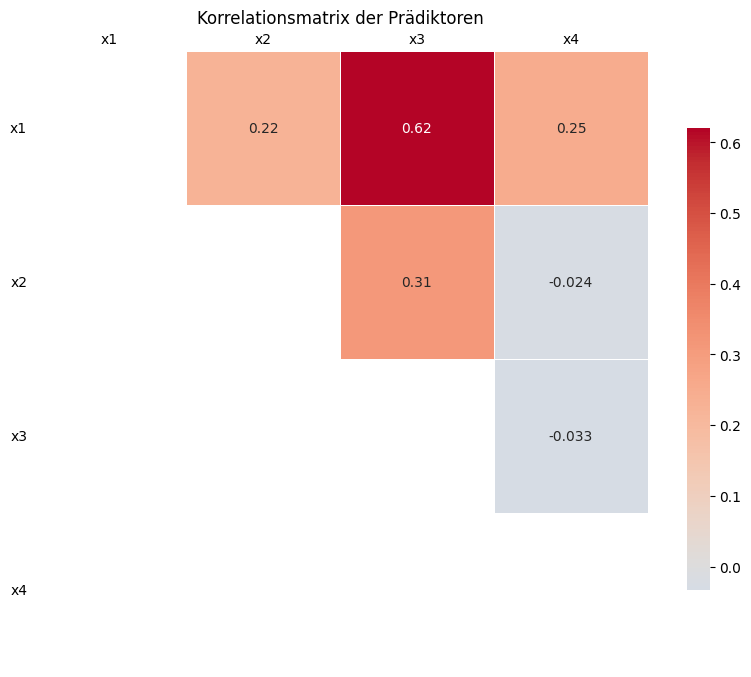

In [16]:
# Kolinearität der Prädiktoren überprüfen
correlation_matrix = x_true.corr()

# Ausgabe der Korrelationsmatrix print(correlation_matrix)
import seaborn as sns
import matplotlib.pyplot as plt

###
# Maske erstellen, um die obere Dreieckshälfte auszublenden
mask = np.tril(np.ones_like(correlation_matrix, dtype=bool))

# Reihenfolge der Spalten umkehren
#correlation_matrix = correlation_matrix.iloc[::1,::-1]

# Heatmap erstellen
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.75})

# Erstellen der Heatmap mit den verbleibenden Daten

# x-Achse oben darstellen und Reihenfolge der Spalten umkehren
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.gca().xaxis.tick_top()
plt.gca().tick_params(length=0)

# Titel hinzufügen
plt.title('Korrelationsmatrix der Prädiktoren', pad=20)

plt.show()


For further reading:

https://www.uni-trier.de/fileadmin/urt/doku/linreg/linreg.pdf

https://www.methodenberatung.uzh.ch/de/datenanalyse_spss/zusammenhaenge/mreg.html

https://www.uni-due.de/imperia/md/content/iac/git_erw_1.pdf